In [42]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import math

In [43]:
team_codes = ['PHI', 'MIL', 'CHI', 'CLE', 'BOS', 'LAC', 'MEM', 'ATL', 'MIA', 'CHA', 'UTA', 'SAC', 'NYK', 
             'LAL', 'ORL', 'DAL', 'BRK', 'DEN', 'IND', 'NOP', 'DET', 'TOR', 'HOU', 'SAS', 'PHX', 'OKC', 
             'MIN', 'POR', 'GSW', 'WAS']

In [107]:
year = 2019
team = 'BRK'
url = "https://www.basketball-reference.com/teams/{}/{}/gamelog/".format(team, year)
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
headers = headers[1:]

rows = soup.findAll('tr')[2:]
gamelog = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

stats = pd.DataFrame(gamelog, columns = headers)
stats = stats.dropna()
stats = stats.reset_index(drop=True)
stats.head(10)

,G,Date,,Opp,W/L,Tm,Opp,FG,FGA,FG%,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,1,2018-10-17,@,DET,L,100,103,40,82,.488,...,19,22,.864,14,46,21,5,5,14,20
1,2,2018-10-19,,NYK,W,107,105,37,75,.493,...,18,20,.900,12,36,14,10,1,3,19
2,3,2018-10-20,@,IND,L,112,132,41,86,.477,...,14,22,.636,10,40,21,12,5,10,18
3,4,2018-10-24,@,CLE,W,102,86,38,87,.437,...,15,16,.938,16,53,18,5,2,15,19
4,5,2018-10-26,@,NOP,L,115,117,43,98,.439,...,20,26,.769,15,46,23,11,11,11,20
5,6,2018-10-28,,GSW,L,114,120,42,87,.483,...,21,24,.875,12,47,28,11,7,12,16
6,7,2018-10-29,@,NYK,L,96,115,34,84,.405,...,16,18,.889,16,53,21,5,3,13,21
7,8,2018-10-31,,DET,W,120,119,43,101,.426,...,30,39,.769,14,55,16,8,6,16,30
8,9,2018-11-02,,HOU,L,111,119,42,85,.494,...,22,32,.688,11,41,22,4,10,9,21
9,10,2018-11-04,,PHI,W,122,97,50,105,.476,...,31,41,.756,9,46,16,6,1,27,21


(array([ 5., 10., 14., 22., 12., 12.,  2.,  1.,  4.]),
 array([ 87.        ,  93.77777778, 100.55555556, 107.33333333,
        114.11111111, 120.88888889, 127.66666667, 134.44444444,
        141.22222222, 148.        ]),
 <a list of 9 Patch objects>)

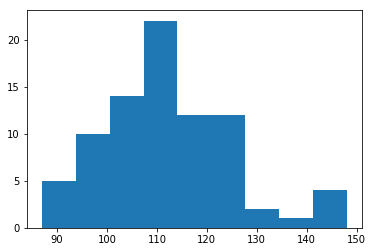

In [109]:
fgs = list(stats['Tm'])
fgs = [int(i) for i in fgs] 
plot.hist(fgs, bins = 9)
